# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset that we will be using is Soccer Databaset which contains data about players, teams, leagues, matchs and much more. We will wrangle this data with different steps to make appropriate for analysis and to help us answer the below questions


### Questions for Analysis
>The most winning team from 2008 to 2016

>Top Ten winning teams from 2008 to 2016

>Max number of goals per league per year

>Which players had the most penalties?

>Top 10 oldest players 

>Top 10 younger players 

These questions will be investigate more by cleaning the data that we have and test some statistics so we can be able to answer them through our numbers and draw the right charts that represent them

In [1]:
# importing packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Load your data and print out a few lines. 
df_country = pd.read_csv('Database_Soccer/Country.csv')
df_league = pd.read_csv('Database_Soccer/League.csv')
df_match = pd.read_csv('Database_Soccer/Match.csv')
df_player = pd.read_csv('Database_Soccer/Player.csv')
df_pa = pd.read_csv('Database_Soccer/Player_Attributes.csv')
df_ss = pd.read_csv('Database_Soccer/sqlite_sequence.csv')
df_team = pd.read_csv('Database_Soccer/Team.csv')
df_ta = pd.read_csv('Database_Soccer/Team_Attributes.csv')

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


<a id='wrangling'></a>
## Data Wrangling

> **Assessing & Cleaning **: The data will be chacked for any missing values, dupliactes rows to make the data ready to be analylized and draw our conclusions


In [3]:
#checking the missing values and the type of columns in match table
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [4]:
#checking for any null values
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [5]:
#dropping the unnecessary columns 
df_match1 = df_match.drop(df_match.columns[11:115], axis=1)

In [6]:
#checking the columns for match dataset
df_match1.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

### Now we have dropped the unuseful columns in our analysis first before getting rid of missing values and this is better than doing the opposite in order to keep larger dataset to make much more solid insights

In [7]:
df_match1.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [8]:
df_match1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [9]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [10]:
df_team.dropna(inplace=True)

In [11]:
print(df_league.info())
print(df_country.info())
print(df_player.info())
print(df_pa.info())
print(df_ta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [12]:
df_pa = df_pa.dropna()
df_ta = df_ta.drop('buildUpPlayDribbling',axis=1)

In [13]:
#checking the number of duplicate rows in all of our tables 
print(df_league.duplicated().sum())
print(df_country.duplicated().sum())
print(df_match1.duplicated().sum())
print(df_team.duplicated().sum())
print(df_player.duplicated().sum())
print(df_pa.duplicated().sum())
print(df_ta.duplicated().sum())

0
0
0
0
0
0
0


<a id='wrangling'></a>
## Merging Tables

>Now we have cleaned all of the tables that have our dataset. We can start now to merge these tables to get more rebust analysis

In [14]:
#Joining the league table with country table to create a new table "lc" on "id"
df_lc = df_league.merge(df_country, how='inner', on='id')
df_lc.head()

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


In [15]:
#Joining the match1 table with country table on "id" and "country_id"
df_match1 = df_match1.merge(df_country, how='inner', left_on= "country_id", right_on = "id")
df_match1.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium


In [16]:
#Joining the match1 table with team table on 'home_team_api_id' and 'team_api_id'
df_match1 = df_match1.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
df_match1.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,9999,1,1,1,Belgium,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,9984,3,2,1,Belgium,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,9986,1,0,1,Belgium,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,9998,2,0,1,Belgium,1,9987,673.0,KRC Genk,GEN


In [17]:
#Joining the match1 table with league table on 'league_id' and 'id'
df_match1 = df_match1.merge(df_league, how='inner', left_on='league_id', right_on='id')
df_match1.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id_y,name_x,id_x,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_y,country_id_y,name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1,Belgium,1,9987,673.0,KRC Genk,GEN,1,1,Belgium Jupiler League
1,29,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,9999,1,...,1,Belgium,1,9987,673.0,KRC Genk,GEN,1,1,Belgium Jupiler League
2,47,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,9984,3,...,1,Belgium,1,9987,673.0,KRC Genk,GEN,1,1,Belgium Jupiler League
3,65,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,9986,1,...,1,Belgium,1,9987,673.0,KRC Genk,GEN,1,1,Belgium Jupiler League
4,94,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,9998,2,...,1,Belgium,1,9987,673.0,KRC Genk,GEN,1,1,Belgium Jupiler League


In [18]:
#Left joining match2 table with team table on 'away_team_api_id' and 'team_api_id'
df_match1 = df_match1.merge(df_team, how='left', left_on='away_team_api_id', right_on='team_api_id')
df_match1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25801 entries, 0 to 25800
Data columns (total 26 columns):
id_x                  25801 non-null int64
country_id_x          25801 non-null int64
league_id             25801 non-null int64
season                25801 non-null object
stage                 25801 non-null int64
date                  25801 non-null object
match_api_id          25801 non-null int64
home_team_api_id      25801 non-null int64
away_team_api_id      25801 non-null int64
home_team_goal        25801 non-null int64
away_team_goal        25801 non-null int64
id_y                  25801 non-null int64
name_x                25801 non-null object
id_x                  25801 non-null int64
team_api_id_x         25801 non-null int64
team_fifa_api_id_x    25801 non-null float64
team_long_name_x      25801 non-null object
team_short_name_x     25801 non-null object
id_y                  25801 non-null int64
country_id_y          25801 non-null int64
name_y                25

In [19]:
#After merging the tables we can now drop the repated columns caused by joining tables
df_match1.head(15)
df_match1.drop(['id_y','country_id_y','team_short_name_x','team_short_name_y','away_team_api_id','country_id_x'],axis=1,inplace=True)

In [20]:
#Renaming the fileds with more descriptive names

df_match1 = df_match1.rename(columns = {'name_x':'country','name_y':'League','team_api_id_x':'home_api_id','team_api_id_y':'away_api_id','team_long_name_x':'home_team_name','team_long_name_y':'away_team_name'})

In [21]:
df_match1.info()
df_match1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25801 entries, 0 to 25800
Data columns (total 19 columns):
id_x                  25801 non-null int64
league_id             25801 non-null int64
season                25801 non-null object
stage                 25801 non-null int64
date                  25801 non-null object
match_api_id          25801 non-null int64
home_team_api_id      25801 non-null int64
home_team_goal        25801 non-null int64
away_team_goal        25801 non-null int64
country               25801 non-null object
id_x                  25801 non-null int64
home_api_id           25801 non-null int64
team_fifa_api_id_x    25801 non-null float64
home_team_name        25801 non-null object
League                25801 non-null object
id                    25629 non-null float64
away_api_id           25629 non-null float64
team_fifa_api_id_y    25629 non-null float64
away_team_name        25629 non-null object
dtypes: float64(4), int64(9), object(6)
memory usage: 3.9+ M

,id_x,league_id,season,stage,date,match_api_id,home_team_api_id,home_team_goal,away_team_goal,country,id_x,home_api_id,team_fifa_api_id_x,home_team_name,League,id,away_api_id,team_fifa_api_id_y,away_team_name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,Belgium,1,9987,673.0,KRC Genk,Belgium Jupiler League,2.0,9993.0,675.0,Beerschot AC
1,29,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,1,1,Belgium,1,9987,673.0,KRC Genk,Belgium Jupiler League,13.0,9999.0,546.0,KSV Roeselare
2,47,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,3,2,Belgium,1,9987,673.0,KRC Genk,Belgium Jupiler League,5.0,9984.0,1750.0,KSV Cercle Brugge
3,65,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,1,0,Belgium,1,9987,673.0,KRC Genk,Belgium Jupiler League,18.0,9986.0,670.0,Sporting Charleroi
4,94,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,2,0,Belgium,1,9987,673.0,KRC Genk,Belgium Jupiler League,8.0,9998.0,1747.0,RAEC Mons


In [22]:
#Formating the date with the correct format to perform some calculations on it

df_match1['date'] = pd.to_datetime(df_match['date'])
df_match1['season_year'] = df_match1['date'].dt.year

In [23]:
#Defining a Function to determine which team won the match from the bigger home_team_goal and away_team_goal

def win(df_match1):
    
    home_score = df_match1['home_team_goal'] 
    away_score = df_match1['away_team_goal'] 
    home_team_name = df_match1['home_team_name']
    away_team_name = df_match1['away_team_name'] 
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'draw'

In [24]:
#appling our win fn on to create a new column by using the mentioned attributes
df_match1['winner']  = df_match1[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(win, axis=1)
df_match1.head()

,id_x,league_id,season,stage,date,match_api_id,home_team_api_id,home_team_goal,away_team_goal,country,...,home_api_id,team_fifa_api_id_x,home_team_name,League,id,away_api_id,team_fifa_api_id_y,away_team_name,season_year,winner
0,1,1,2008/2009,1,2008-08-17,492473,9987,1,1,Belgium,...,9987,673.0,KRC Genk,Belgium Jupiler League,2.0,9993.0,675.0,Beerschot AC,2008,draw
1,29,1,2008/2009,12,2008-08-16,492583,9987,1,1,Belgium,...,9987,673.0,KRC Genk,Belgium Jupiler League,13.0,9999.0,546.0,KSV Roeselare,2008,draw
2,47,1,2008/2009,14,2008-08-16,492651,9987,3,2,Belgium,...,9987,673.0,KRC Genk,Belgium Jupiler League,5.0,9984.0,1750.0,KSV Cercle Brugge,2008,KRC Genk
3,65,1,2008/2009,16,2008-08-17,492713,9987,1,0,Belgium,...,9987,673.0,KRC Genk,Belgium Jupiler League,18.0,9986.0,670.0,Sporting Charleroi,2008,KRC Genk
4,94,1,2008/2009,19,2008-08-16,492805,9987,2,0,Belgium,...,9987,673.0,KRC Genk,Belgium Jupiler League,8.0,9998.0,1747.0,RAEC Mons,2008,KRC Genk


In [25]:
#Cheching the matched columns between player table and player_attributes table so we can join between them

print(df_player.head())
df_pa.head()

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [26]:
#joining player table with pa table using the similartiy of "player api id" column
df_players = df_player.merge(df_pa, how='inner', on='player_api_id')
df_players.info()
df_players[['id_x','id_y','player_api_id','player_fifa_api_id_x','player_fifa_api_id_y']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 180353
Data columns (total 48 columns):
id_x                    180354 non-null int64
player_api_id           180354 non-null int64
player_name             180354 non-null object
player_fifa_api_id_x    180354 non-null int64
birthday                180354 non-null object
height                  180354 non-null float64
weight                  180354 non-null int64
id_y                    180354 non-null int64
player_fifa_api_id_y    180354 non-null int64
date                    180354 non-null object
overall_rating          180354 non-null float64
potential               180354 non-null float64
preferred_foot          180354 non-null object
attacking_work_rate     180354 non-null object
defensive_work_rate     180354 non-null object
crossing                180354 non-null float64
finishing               180354 non-null float64
heading_accuracy        180354 non-null float64
short_passing           180354 non-null flo

,id_x,id_y,player_api_id,player_fifa_api_id_x,player_fifa_api_id_y
0,1,1,505942,218353,218353
1,1,2,505942,218353,218353
2,1,3,505942,218353,218353
3,1,4,505942,218353,218353
4,1,5,505942,218353,218353
5,2,6,155782,189615,189615
6,2,7,155782,189615,189615
7,2,8,155782,189615,189615
8,2,9,155782,189615,189615
9,2,10,155782,189615,189615


In [27]:
#dropping the repated columns caused by joining tables

df_players.drop(['id_x','id_y','player_fifa_api_id_y'],axis=1,inplace=True)
df_players.head()

,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
#Formating date and creating a new column "Age" to know the age of players

df_players['birthday'] = pd.to_datetime(df_players['birthday'])
df_players['date'] = pd.to_datetime(df_players['date'])
df_players['age'] = df_players['date'].dt.year - df_players['birthday'].dt.year

<a id='eda'></a>
## Exploratory Data Analysis

> Now we have cleaned the data and its ready for our analysis, we will answer our questions by calculating some statistics and visualizing the output in order to better understand the answers for thoses questions 



### Now we need to measure some statistics like (mean, std, min, max) for our data to check if we do have any outliers and if the data is consistent or not. Note that we can do this only for the numerical data

In [29]:
#Summary statistics

df_match1.describe()

,id_x,league_id,stage,match_api_id,home_team_api_id,home_team_goal,away_team_goal,id_x,home_api_id,team_fifa_api_id_x,id,away_api_id,team_fifa_api_id_y,season_year
count,25801.000000,25801.000000,25801.000000,2.580100e+04,25801.000000,25801.000000,25801.000000,25801.000000,25801.000000,25801.000000,25629.000000,25629.000000,25629.000000,25801.000000
mean,12974.568079,11720.319484,18.254370,1.195778e+06,9785.581489,1.547072,1.159064,23828.293089,9785.581489,15849.694004,23792.360451,9778.711304,15827.562293,2011.974458
std,7494.682523,7551.247905,10.412492,4.930191e+05,12747.995890,1.298525,1.139992,15089.221831,12747.995890,37336.801976,15083.691240,12722.530720,37318.772780,2.344333
min,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,0.000000,0.000000,1.000000,1601.000000,1.000000,1.000000,1601.000000,1.000000,2008.000000
25%,6485.000000,4769.000000,9.000000,8.204820e+05,8481.000000,1.000000,0.000000,9551.000000,8481.000000,80.000000,9551.000000,8481.000000,80.000000,2010.000000
50%,12935.000000,10257.000000,18.000000,1.189720e+06,8697.000000,1.000000,1.000000,21292.000000,8697.000000,467.000000,21292.000000,8697.000000,462.000000,2012.000000
75%,19489.000000,17642.000000,27.000000,1.709830e+06,9925.000000,2.000000,2.000000,37210.000000,9925.000000,1892.000000,37214.000000,9911.000000,1892.000000,2014.000000
max,25979.000000,24558.000000,38.000000,2.216672e+06,274581.000000,10.000000,9.000000,50204.000000,274581.000000,112513.000000,50204.000000,274581.000000,112513.000000,2016.000000


In [30]:
df_players.describe()

,player_api_id,player_fifa_api_id_x,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000,180354.000000
mean,137653.145514,166805.312530,181.877895,168.774593,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,...,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531,25.671535
std,137599.735284,52825.971635,6.398588,15.098388,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,...,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545,4.715898
min,2625.000000,2.000000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,8.000000
25%,35451.000000,156593.000000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,...,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000,22.000000
50%,80291.000000,183774.000000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,...,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000,25.000000
75%,192841.000000,200130.000000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,...,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000,29.000000
max,750584.000000,234141.000000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,...,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000,44.000000


## Question 1 : The most winning team from 2008 to 2016

### we need to check the team that has scored the highest number of winning games from 2008-2016

In [31]:
#filter the data that doesn't match draw in winning columns then group the data with "season year" and "league" and "winner" then count the values 
df_match1 = df_match1.query('winner != "draw"')
most_win = df_match1.groupby(['season_year','League','winner'])['winner'].value_counts().idxmax()
most_win

(2012, 'Spain LIGA BBVA', 'Real Madrid CF', 'Real Madrid CF')

### So the most winning team from 2008 to 2016 is [Real Madrid CF]

## Question 2 : Top Ten winning teams from 2008 to 2016

### This question will help us know the top winning teams per year as by counting how many time they won as a metric to determine the best

In [32]:
df_match1 = df_match1.query('winner != "draw"')
most_win_teams = df_match1.groupby(['season_year','League','winner'])['winner'].count().sort_values(ascending=False)[0:11]
most_win_teams

season_year  League                   winner                
2012         Spain LIGA BBVA          Real Madrid CF            117
2014         England Premier League   Manchester City           112
2010         Scotland Premier League  Celtic                     93
2009         England Premier League   Arsenal                    93
2012         Spain LIGA BBVA          FC Barcelona               90
2008         England Premier League   Manchester United          88
2014         Italy Serie A            Napoli                     88
2013         Germany 1. Bundesliga    Borussia Dortmund          86
2015         Netherlands Eredivisie   PSV                        84
2011         Spain LIGA BBVA          Atlético Madrid            81
2012         France Ligue 1           Olympique de Marseille     81
Name: winner, dtype: int64

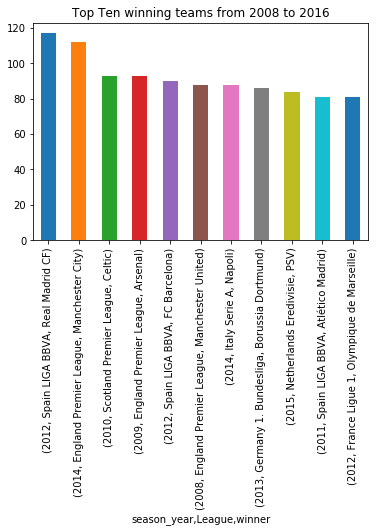

In [33]:
most_win_teams.plot(kind='bar', title='Top Ten winning teams from 2008 to 2016');

### Here we have 3 teams from Spain LIGA BBVA (Real Madrid CF, FC Barcelona, Atlético Madrid) and another 3 teams from England Premier League (Manchester City, Arsenal, Manchester United) 

### These are the most winning teams and their chances to won any match are the highest  from 2008-2016

## Question 3 :  Max number of goals per league per year

### Measuring the leagues that had the highest number of goals as a metric to determine the most entertaining leagues

In [34]:
#creating a new column "goals" by adding 'home_team_goal' to 'away_team_goal' to know the number of goals scored by the team
df_match1['goals'] = df_match1['home_team_goal'] + df_match1['away_team_goal']


In [35]:
#group the data by 'season year' and 'league' and sum the gaols that scored for each league and sort the results
goals = df_match1.groupby(['season_year','League'])['goals'].sum().sort_values(ascending=False)[0:16]
goals

season_year  League                
2012         Spain LIGA BBVA           1235
2011         Spain LIGA BBVA           1049
2010         Spain LIGA BBVA            905
2014         England Premier League     883
2009         England Premier League     859
2012         England Premier League     847
2014         Italy Serie A              832
2015         Netherlands Eredivisie     828
2013         Italy Serie A              827
2010         Italy Serie A              819
2015         Spain LIGA BBVA            819
2013         England Premier League     810
2012         Italy Serie A              798
2014         Netherlands Eredivisie     796
2011         Italy Serie A              796
2015         England Premier League     791
Name: goals, dtype: int64

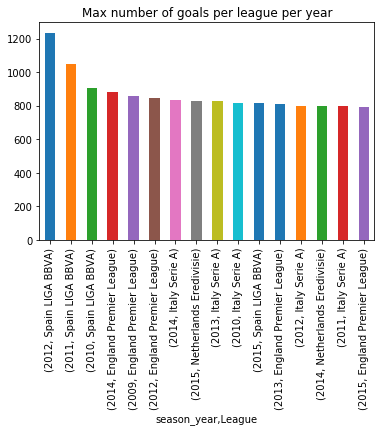

In [36]:
goals.plot(kind='bar',title ='Max number of goals per league per year');

### Seems that Spain LIGA BBVA dominated the top 3 ranks for (2012,2011,2010) with the highest number of goals which means that it was the most entertaining league for these years 

### Also England Premier League has the ranks from 4 to 6 with the years (2009,2012,2014) so it's also very amusing and has a great matches to watch 

## Question 4 : Which players had the most penalties?

### Here we are tring to get the most players who have had the highest number of penalties from 2008-2016 to check if there is any extreme score or even if there is any baised reasons for that score

In [37]:
#groupby 'players name' and penalties then sort the maximum number of penalites scored by each player and select the top 10
penalties = df_players.groupby('player_name')['penalties'].max().sort_values(ascending=False)[0:11]
penalties

player_name
Rickie Lambert     96.0
Mario Balotelli    95.0
Xavi Hernandez     95.0
Andrea Pirlo       95.0
Paul Scholes       95.0
David Trezeguet    94.0
Cesc Fabregas      94.0
Adrian Mutu        94.0
Iker Casillas      94.0
Hernan Crespo      93.0
Fernando Torres    93.0
Name: penalties, dtype: float64

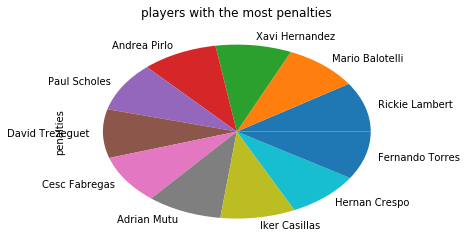

In [38]:
penalties.plot(kind='pie',title='players with the most penalties');

### Question 5 : Top 10 oldest players 

### Here we are checking the top 10 players who were cabibale to play till the highest age and maintained their performance even when they become older

In [39]:
#group by "player name" and "age" and sort the date descending and select only the top 10 
oldest = df_players.groupby('player_name')['age'].max().sort_values(ascending=False)[0:11]


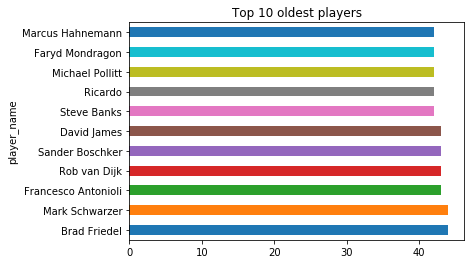

In [40]:
oldest.plot(kind='barh', title='Top 10 oldest players');

## Question 6 : Top 10 younger players 

### Here we are trying to check the most youngest players that have joined the competation and leagues from 2088-2016

In [41]:
#group by "player name" and "age" and sort the date ascending and select only the top 10 
younger = df_players.groupby('player_name')['age'].max().sort_values(ascending=True)[0:11]


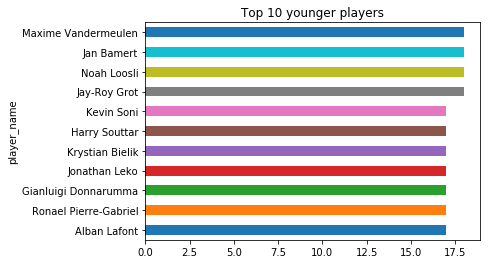

In [42]:
younger.plot(kind='barh', title='Top 10 younger players');

<a id='conclusions'></a>
## Conclusions

>Now we have answered the questions that we have asked using our charts like which are the most entertaining league that you could watch, the top winning teams that you can support and the top 10 players with the highest penalties moreover we have checked the top oldest players vs the top youngest players that played between 2008 and 2016

### Limitations
>The analysis could have showed more accurate results but there was a lot of missing data that might change the output of our analysis. 
